# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [14]:
#  1. Get the total rides for each city type
total_ride_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
# 2. Get the total drivers for each city type
total_driver_type = pyber_data_df.groupby(["type"]).mean()["driver_count"]
total_driver_type

type
Rural        4.296000
Suburban    13.712000
Urban       36.678154
Name: driver_count, dtype: float64

In [16]:
#  3. Get the total amount of fares for each city type
total_fare_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [17]:
#  4. Get the average fare per ride for each city type. 
average_ride_fare = total_fare_type / total_ride_type
average_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [18]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = total_fare_type / total_driver_type
average_driver_fare

type
Rural       1007.432495
Suburban    1411.634335
Urban       1086.597220
dtype: float64

In [23]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Ride":total_ride_type,
    "Total Driver":total_driver_type,
    "Total Fare":total_fare_type,
    "Average Fare per Ride":average_ride_fare,
    "Average Fare per Driver":average_driver_fare
})

pyber_summary_df.head(10)

,Total Ride,Total Driver,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,4.296000,4327.93,34.623440,1007.432495
Suburban,625,13.712000,19356.33,30.970128,1411.634335
Urban,1625,36.678154,39854.38,24.525772,1086.597220


In [24]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [25]:
#  8. Format the columns.
pyber_summary_df["Total Driver"] = pyber_summary_df["Total Driver"].map("{:.0f}".format)
pyber_summary_df["Total Fare"] = pyber_summary_df["Total Fare"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df.head(10)

,Total Ride,Total Driver,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,4,"$4,327.93",$34.62,"$1,007.43"
Suburban,625,14,"$19,356.33",$30.97,"$1,411.63"
Urban,1625,37,"$39,854.38",$24.53,"$1,086.60"


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [26]:
# 1. Read the merged DataFrame
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [44]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_date_df = pd.DataFrame(pyber_data_df.groupby(["date","type"]).sum()["fare"])
fare_by_date_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [45]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_date_df = fare_by_date_df.reset_index()

In [46]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_date_df = fare_by_date_df.pivot(index="date",columns="type",values="fare")
fare_by_date_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [49]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

time_df = fare_by_date_df.loc["2019-01-01":"2019-04-29"]

time_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [54]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

time_df.index = pd.to_datetime(time_df.index)

In [55]:
# 7. Check that the datatype for the index is datetime using df.info()
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [58]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_fare_df = time_df.resample("W").sum()
week_fare_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


C:\Users\ETB DC\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


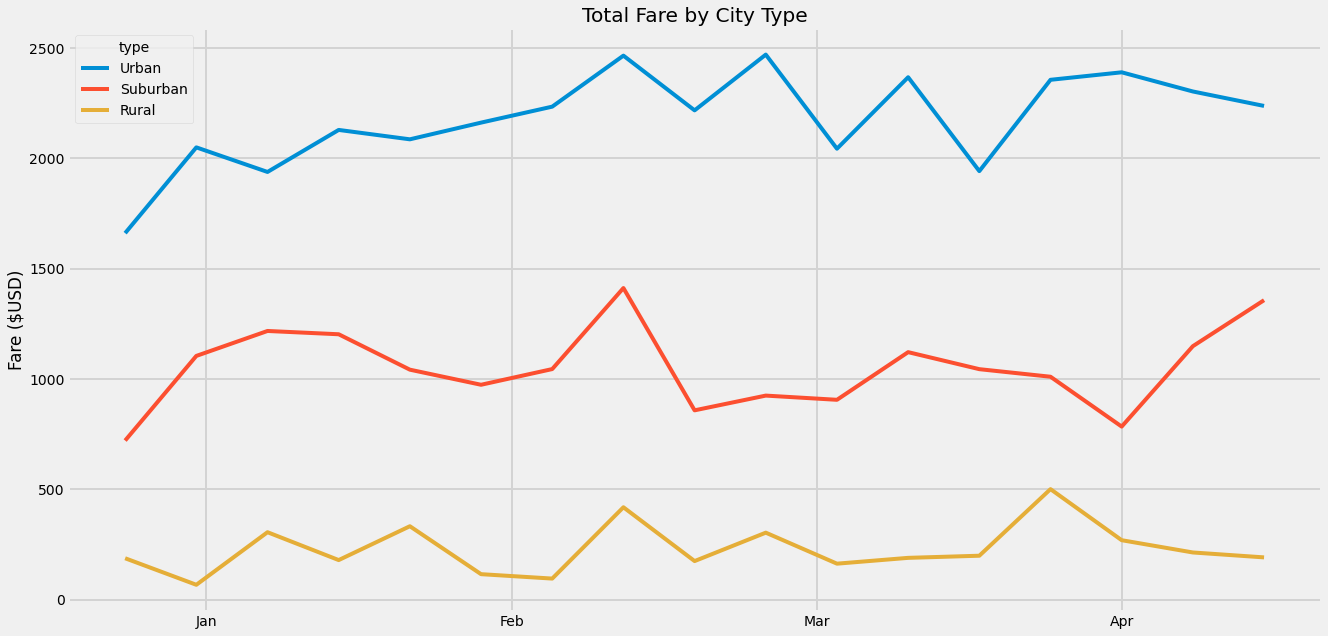

In [111]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

urban_y = week_fare_df["Urban"]
suburban_y = week_fare_df["Suburban"]
rural_y = week_fare_df["Rural"]
x_label = ["","Jan","Feb","Mar","Apr"]

fig,ax = plt.subplots(figsize=(20,10))
ax.plot(urban_y,label="Urban")
ax.plot(suburban_y,label="Suburban")
ax.plot(rural_y,label="Rural")
ax.set_ylabel("Fare ($USD)")
ax.set_title("Total Fare by City Type")
ax.grid(color='lightgrey', linestyle='-', linewidth=2)
ax.legend(title="type")
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.set_xticklabels(x_label)

plt.savefig("analysis/PyBer_fare_summary.png")